## Задача Классификация (бинарная). 
- Датасет, на котором решается задача - это набор данных, содержащий сообщения людей в соц. сетей - vkontakte.
- Каждое сообщение хранится с меткой 0 или 1. 0 - это Тематика без хандры, Единица - рассуждения в состоянии хандры
- Ссылка на датасет [https://www.sciencedirect.com/science/article/pii/S2352340920300895]



In [1]:


import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import collections
import torch
from torch import nn
from torch.nn import functional as F
import re
'''
import dlnlputils
from dlnlputils.data import tokenize_text_simple_regex, tokenize_corpus, build_vocabulary, \
    vectorize_texts, SparseFeaturesDataset
from dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed

init_random_seed()
'''


'\nimport dlnlputils\nfrom dlnlputils.data import tokenize_text_simple_regex, tokenize_corpus, build_vocabulary,     vectorize_texts, SparseFeaturesDataset\nfrom dlnlputils.pipeline import train_eval_loop, predict_with_model, init_random_seed\n\ninit_random_seed()\n'

In [3]:
df = pd.read_excel('../dataset/Handra_Finding.xlsx')

In [4]:
df.head(2)

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0


In [5]:
df['text'][17]

'В этом году издавать экзамены . Мне 14 ... Живу с бабушкой мама с папой в разводе и почти не общаемся .'

In [6]:
X= df['text'].reset_index(drop=True)
y=df['label'].reset_index(drop=True)

In [7]:
X[13]

'хронически "не везет". С детства у меня черная полоса. Во дворе насмехались и обзывались, в школе игнорили и травили, ничего не мог сделать,был слабаком,часто болел,сидел дома,читал книжки,в 9кл.занялся рукопашкой,немного стал покрепче,но запустил учебу и не поступил в институт,в итоге пошел в колледж(экономический),называли ботаном в колледже 3 года,даже преподы подшучивали,кое-как закончил.Замкнулся,ни с кем не общался,вообще не умею общаться,знакомится(с девушками тем более),нету интересов никаких,сижу уже 5 лет дома,читаю книжки и смотрю фильмы, не могу устроиться на работу,хотя уже опыт есть маленько работал дворником в лагере,хотел вожатым - не взяли,опять невезение, других берут, а мне "шиш".,потом устроился в книжный магазин,не сработался с начальницей,куда теперь идти не знаю...родители говорят иди учись,а я не могу,нету сил,да и поздно уже в 28, не знаю чего хочу в жизни,нету цели,кругом пустота какая-то,все куда-то бегут,торопятся,суетятся,я просто не вписываюсь в эту жизнь

In [8]:
dict(df.dtypes)

{'text': dtype('O'), 'label': dtype('int64'), 'age': dtype('float64')}

In [9]:
#Классы сбалансированны. Достаточно метрики Accuracy

In [10]:
y.value_counts()

label
0    32021
1    32018
Name: count, dtype: int64

In [11]:
X = X.astype(str) 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=104,test_size=0.25, shuffle=True)

In [13]:
TOKEN_RE = re.compile(r'[\w\d]+')

def tokenize_text_simple_regex(txt, min_token_size=4):
    #print(txt)
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_token_size]

def character_tokenize(txt): 
    return list(txt)

def tokenize_corpus(texts, tokenizer=tokenize_text_simple_regex, **tokenizer_kwargs): 
    #print(texts)
    return [tokenizer(text, **tokenizer_kwargs) for text in texts]
'''
'''

'\n'

In [14]:
TOKEN_RE

re.compile(r'[\w\d]+', re.UNICODE)

In [15]:
MAX_DF = 0.8
MIN_COUNT = 5

In [16]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [17]:
X_train[1]

'Россия до 2025 года запустит 30 гражданских спутников\n«Роскосмос» до 2025 года планирует запустить на орбиту 30 гражданских космических аппаратов для дистанционного зондирования Земли. Об этом информирует РИА Новости со ссылкой на сообщение\xa0госкорпорации.\nВ том числе планируется вывести на орбиту спутники серий «Метеор-М», «Электро-Л», «Арктика-М», «Ресурс-ПМ» и «Канопус-В».\nОтмечается, что в настоящее время российская орбитальная группировка гражданских спутников дистанционного зондирования Земли состоит из 11 космических аппаратов, в том числе трёх гидрометеорологических, двух оптико-электронных природоресурсных и шести аппаратов для мониторинга чрезвычайных ситуаций.\nРанее источник сообщил, что в конце мая состоится запуск ракеты «Протон-М» с телекоммуникационным спутником «Ямал-601» с космодрома Байконур.'

In [18]:
train_tokenized = tokenize_corpus(X_train) 
test_tokenized = tokenize_corpus(X_test)


In [19]:
print(' '.join(train_tokenized[5]))

уверен первый когда публично признал depression было здорово если поддерживает дать почту mentalhealthawarenessweek sicknotweakhttps twitter thegrumpyloaf status 1128780317983203330


## Реализация через Sklearn

In [378]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

sklearn_pipeline = Pipeline((('vect', TfidfVectorizer(tokenizer=tokenize_text_simple_regex,
                                                        max_df=MAX_DF,
                                                      min_df=MIN_COUNT)),
                             ('cls', LogisticRegression())))
sklearn_pipeline.fit(X_train, y_train);

In [379]:
X_train.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48029 entries, 0 to 48028
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
48029 non-null  object
dtypes: object(1)
memory usage: 375.4+ KB


## Качество Sklearn

In [380]:
sklearn_train_pred = sklearn_pipeline.predict_proba(X_train)
sklearn_train_loss = F.cross_entropy(torch.from_numpy(sklearn_train_pred),
                                                 torch.from_numpy(y_train.to_numpy()))
print('Среднее значение функции потерь на обучении', float(sklearn_train_loss))
print('Доля верных ответов', accuracy_score(y_train.to_numpy(), sklearn_train_pred.argmax(-1)))
print()

sklearn_test_pred = sklearn_pipeline.predict_proba(X_test)
sklearn_test_loss = F.cross_entropy(torch.from_numpy(sklearn_test_pred),
                                                torch.from_numpy(y_test.to_numpy()))
print('Среднее значение функции потерь на валидации', float(sklearn_test_loss))
print('Доля верных ответов', accuracy_score(y_test.to_numpy(), sklearn_test_pred.argmax(-1)))

Среднее значение функции потерь на обучении 0.34335006907395355
Доля верных ответов 0.9933165379250036

Среднее значение функции потерь на валидации 0.3462587837165152
Доля верных ответов 0.988632104934416


In [381]:
len(X_train)

48029

In [382]:
len(X_train)

48029

In [383]:
X_test[14]


'Большую часть пьедестала почета республиканского турнира по настольному теннису «Aktobe-2019» заняли спортсмены из России. Соревнование в честь Года молодежи и 150-летия Актобе проходило в течение двух дней во Дворце единоборств «Жекпе-жек». Турнир организован при поддержке АО «CNPC-Актобемунайгаз», в нем участвовало более 600 спортсменов из 10 регионов РК, а также из России – Оренбурга, Екатеринбурга и ...Сильная подача (видео) http://avestnik.kz/silnaya-podacha-video/ '

In [384]:
y_test.value_counts()

label
1    8027
0    7983
Name: count, dtype: int64

In [385]:
sklearn_test_pred[14]

array([0.98701386, 0.01298614])

In [386]:
sklearn_pipeline.predict([X_test[14]])

array([0])

In [387]:
y_test[14]


0

## Реализация через Pytorch

In [388]:
def build_vocabulary(tokenized_texts, max_size=4500, max_doc_freq=0.8, min_count=5, pad_word=None):
    word_counts = collections.defaultdict(int)
    doc_n = 0

    # посчитать количество документов, в которых употребляется каждое слово
    # а также общее количество документов
    for txt in tokenized_texts:
        doc_n += 1
        unique_text_tokens = set(txt)
        for token in unique_text_tokens:
            word_counts[token] += 1

    # убрать слишком редкие и слишком частые слова
    word_counts = {word: cnt for word, cnt in word_counts.items()
                   if cnt >= min_count and cnt / doc_n <= max_doc_freq}

    # отсортировать слова по убыванию частоты
    sorted_word_counts = sorted(word_counts.items(),
                                reverse=True,
                                key=lambda pair: pair[1])

    # добавим несуществующее слово с индексом 0 для удобства пакетной обработки
    if pad_word is not None:
        sorted_word_counts = [(pad_word, 0)] + sorted_word_counts

    # если у нас по прежнему слишком много слов, оставить только max_size самых частотных
    if len(word_counts) > max_size:
        sorted_word_counts = sorted_word_counts[:max_size]

    # нумеруем слова
    word2id = {word: i for i, (word, _) in enumerate(sorted_word_counts)}

    # нормируем частоты слов
    word2freq = np.array([cnt / doc_n for _, cnt in sorted_word_counts], dtype='float32')

    return word2id, word2freq


In [389]:
MAX_DF = 0.8
MIN_COUNT = 5
vocabulary, word_doc_freq = build_vocabulary(train_tokenized, max_doc_freq=MAX_DF, min_count=MIN_COUNT)
UNIQUE_WORDS_N = len(vocabulary)
print('Количество уникальных токенов', UNIQUE_WORDS_N)
print(list(vocabulary.items())[:10])

Количество уникальных токенов 4500
[('меня', 0), ('года', 1), ('очень', 2), ('только', 3), ('себя', 4), ('хочу', 5), ('было', 6), ('жить', 7), ('просто', 8), ('жизни', 9)]


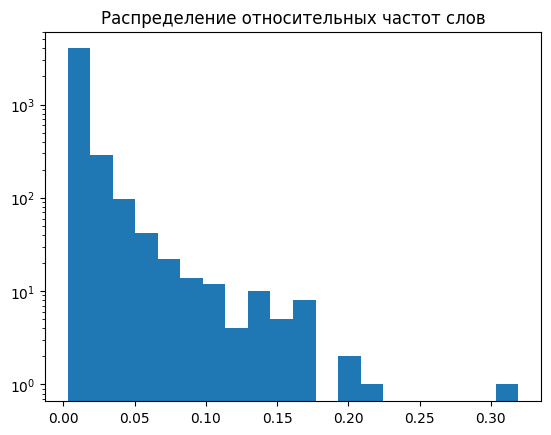

In [390]:
plt.hist(word_doc_freq, bins=20)
plt.title('Распределение относительных частот слов')
plt.yscale('log');


Закон Ципфа - Частота употребления слов обратно зависит от объема документа

In [391]:
def vectorize_texts(tokenized_texts, word2id, word2freq,mode='tfidf'):
    #assert mode in {'tfidf', 'idf', 'tf', 'bin'}

    # считаем количество употреблений каждого слова в каждом документе
    result = scipy.sparse.dok_matrix((len(tokenized_texts), len(word2id)), dtype='float32')
    for text_i, text in enumerate(tokenized_texts):
        for token in text:
            if token in word2id:
                result[text_i, word2id[token]] += 1

    # учитываем всю информацию, которая у нас есть:
    # частоту слова в документе и частоту слова в корпусе
    if mode == 'tfidf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))  # разделить каждую строку на её длину
        result = result.multiply(1 / word2freq)  # разделить каждый столбец на вес слова

    
    result = result.tocsc()
    result -= result.min()
    result /= (result.max() + 1e-6)

    return result.tocsr()


In [392]:

train_vectors = vectorize_texts(train_tokenized, vocabulary, word_doc_freq )
test_vectors = vectorize_texts(test_tokenized, vocabulary, word_doc_freq)

print('Размерность матрицы признаков обучающей выборки', train_vectors.shape)
print('Размерность матрицы признаков тестовой выборки', test_vectors.shape)
print()
print('Количество ненулевых элементов в обучающей выборке', train_vectors.nnz)
print('Процент заполненности матрицы признаков {:.2f}%'.format(train_vectors.nnz * 100 / (train_vectors.shape[0] * train_vectors.shape[1])))
print()
print('Количество ненулевых элементов в тестовой выборке', test_vectors.nnz)
print('Процент заполненности матрицы признаков {:.2f}%'.format(test_vectors.nnz * 100 / (test_vectors.shape[0] * test_vectors.shape[1])))

Размерность матрицы признаков обучающей выборки (48029, 4500)
Размерность матрицы признаков тестовой выборки (16010, 4500)

Количество ненулевых элементов в обучающей выборке 2340648
Процент заполненности матрицы признаков 1.08%

Количество ненулевых элементов в тестовой выборке 785180
Процент заполненности матрицы признаков 1.09%


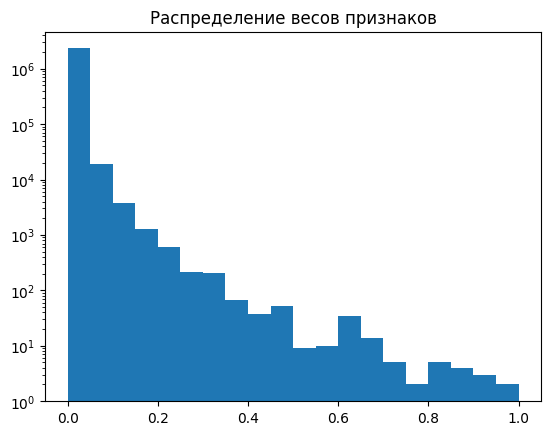

In [393]:
plt.hist(train_vectors.data, bins=20)
plt.title('Распределение весов признаков')
plt.yscale('log');

Распределение классов

In [394]:
UNIQUE_LABELS_N = len(set(y_train))
print('Количество уникальных меток', UNIQUE_LABELS_N)

Количество уникальных меток 2


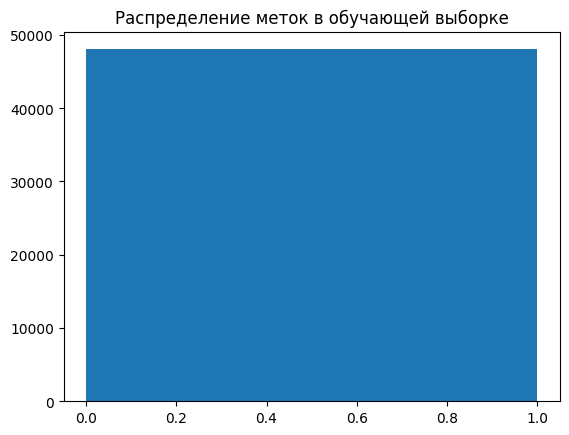

In [395]:
plt.hist(y_train, bins=np.arange(0, 2))
plt.title('Распределение меток в обучающей выборке');

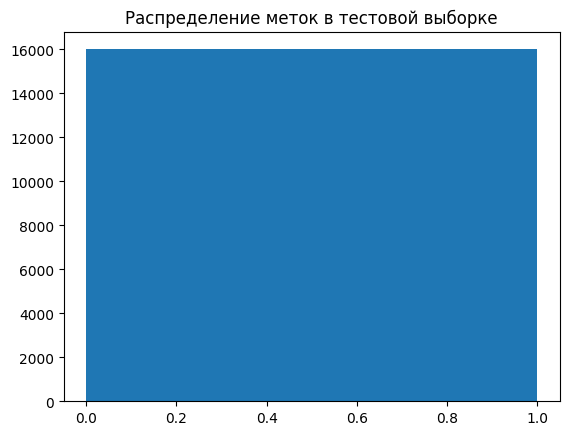

In [396]:
plt.hist(y_test, bins=np.arange(0, 2))
plt.title('Распределение меток в тестовой выборке');

In [397]:
from torch.utils.data import Dataset
class SparseFeaturesDataset(Dataset):
    def __init__(self, features, targets):
        self.features = features
        self.targets = targets

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self, idx):
        cur_features = torch.from_numpy(self.features[idx].toarray()[0]).float()
        cur_label = torch.from_numpy(np.asarray(self.targets[idx])).long()
        return cur_features, cur_label

In [398]:
train_dataset = SparseFeaturesDataset(train_vectors, y_train)
test_dataset = SparseFeaturesDataset(test_vectors, y_test)

In [399]:
train_dataset

## методы из курсы, перенесенные с github

In [414]:
import copy
import datetime
import random
import traceback
import numpy as np
import torch
from torch.utils.data import DataLoader

def train_eval_loop(model, train_dataset, val_dataset, criterion,
                    lr=1e-4, epoch_n=10, batch_size=32,
                    device=None, early_stopping_patience=10, l2_reg_alpha=0,
                    max_batches_per_epoch_train=10000,
                    max_batches_per_epoch_val=1000,
                    data_loader_ctor=DataLoader,
                    optimizer_ctor=None,
                    lr_scheduler_ctor=None,
                    shuffle_train=True,
                    dataloader_workers_n=0):
    """
    Цикл для обучения модели. После каждой эпохи качество модели оценивается по отложенной выборке.
    :param model: torch.nn.Module - обучаемая модель
    :param train_dataset: torch.utils.data.Dataset - данные для обучения
    :param val_dataset: torch.utils.data.Dataset - данные для оценки качества
    :param criterion: функция потерь для настройки модели
    :param lr: скорость обучения
    :param epoch_n: максимальное количество эпох
    :param batch_size: количество примеров, обрабатываемых моделью за одну итерацию
    :param device: cuda/cpu - устройство, на котором выполнять вычисления
    :param early_stopping_patience: наибольшее количество эпох, в течение которых допускается
        отсутствие улучшения модели, чтобы обучение продолжалось.
    :param l2_reg_alpha: коэффициент L2-регуляризации
    :param max_batches_per_epoch_train: максимальное количество итераций на одну эпоху обучения
    :param max_batches_per_epoch_val: максимальное количество итераций на одну эпоху валидации
    :param data_loader_ctor: функция для создания объекта, преобразующего датасет в батчи
        (по умолчанию torch.utils.data.DataLoader)
    :return: кортеж из двух элементов:
        - среднее значение функции потерь на валидации на лучшей эпохе
        - лучшая модель
    """
    if device is None:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
    device = torch.device(device)
    model.to(device)

    if optimizer_ctor is None:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=l2_reg_alpha)
    else:
        optimizer = optimizer_ctor(model.parameters(), lr=lr)

    if lr_scheduler_ctor is not None:
        lr_scheduler = lr_scheduler_ctor(optimizer)
    else:
        lr_scheduler = None

    train_dataloader = data_loader_ctor(train_dataset, batch_size=batch_size, shuffle=shuffle_train,
                                        num_workers=dataloader_workers_n)
    val_dataloader = data_loader_ctor(val_dataset, batch_size=batch_size, shuffle=False,
                                      num_workers=dataloader_workers_n)

    best_val_loss = float('inf')
    best_epoch_i = 0
    best_model = copy.deepcopy(model)

    for epoch_i in range(epoch_n):
        try:
            epoch_start = datetime.datetime.now()
            print('Эпоха {}'.format(epoch_i))

            model.train()
            mean_train_loss = 0
            train_batches_n = 0
            for batch_i, (batch_x, batch_y) in enumerate(train_dataloader):
                if batch_i > max_batches_per_epoch_train:
                    break

                batch_x = copy_data_to_device(batch_x, device)
                batch_y = copy_data_to_device(batch_y, device)

                pred = model(batch_x)
                loss = criterion(pred, batch_y)

                model.zero_grad()
                loss.backward()

                optimizer.step()

                mean_train_loss += float(loss)
                train_batches_n += 1

            mean_train_loss /= train_batches_n
            print('Эпоха: {} итераций, {:0.2f} сек'.format(train_batches_n,
                                                           (datetime.datetime.now() - epoch_start).total_seconds()))
            print('Среднее значение функции потерь на обучении', mean_train_loss)



            model.eval()
            mean_val_loss = 0
            val_batches_n = 0

            with torch.no_grad():
                for batch_i, (batch_x, batch_y) in enumerate(val_dataloader):
                    if batch_i > max_batches_per_epoch_val:
                        break

                    batch_x = copy_data_to_device(batch_x, device)
                    batch_y = copy_data_to_device(batch_y, device)

                    pred = model(batch_x)
                    loss = criterion(pred, batch_y)

                    mean_val_loss += float(loss)
                    val_batches_n += 1

            mean_val_loss /= val_batches_n
            print('Среднее значение функции потерь на валидации', mean_val_loss)

            if mean_val_loss < best_val_loss:
                best_epoch_i = epoch_i
                best_val_loss = mean_val_loss
                best_model = copy.deepcopy(model)
                print('Новая лучшая модель!')
            elif epoch_i - best_epoch_i > early_stopping_patience:
                print('Модель не улучшилась за последние {} эпох, прекращаем обучение'.format(
                    early_stopping_patience))
                break

            if lr_scheduler is not None:
                lr_scheduler.step(mean_val_loss)

            print()
        except KeyboardInterrupt:
            print('Досрочно остановлено пользователем')
            break
        except Exception as ex:
            print('Ошибка при обучении: {}\n{}'.format(ex, traceback.format_exc()))
            break

    return best_val_loss, best_model


def predict_with_model(model, dataset, device=None, batch_size=32, num_workers=0, return_labels=False):
    """
    :param model: torch.nn.Module - обученная модель
    :param dataset: torch.utils.data.Dataset - данные для применения модели
    :param device: cuda/cpu - устройство, на котором выполнять вычисления
    :param batch_size: количество примеров, обрабатываемых моделью за одну итерацию
    :return: numpy.array размерности len(dataset) x *
    """
    if device is None:
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
    results_by_batch = []

    device = torch.device(device)
    model.to(device)
    model.eval()

    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    labels = []
    with torch.no_grad():
        import tqdm
        for batch_x, batch_y in tqdm.tqdm(dataloader, total=len(dataset)/batch_size):
            batch_x = copy_data_to_device(batch_x, device)

            if return_labels:
                labels.append(batch_y.numpy())

            batch_pred = model(batch_x)
            results_by_batch.append(batch_pred.detach().cpu().numpy())

    if return_labels:
        return np.concatenate(results_by_batch, 0), np.concatenate(labels, 0)
    else:
        return np.concatenate(results_by_batch, 0)
        
def copy_data_to_device(data, device):
    if torch.is_tensor(data):
        return data.to(device)
    elif isinstance(data, (list, tuple)):
        return [copy_data_to_device(elem, device) for elem in data]
    raise ValueError('Недопустимый тип данных {}'.format(type(data)))

## Качество модели Pytorch

In [403]:
model = nn.Linear(UNIQUE_WORDS_N, UNIQUE_LABELS_N)

scheduler = lambda optim: torch.optim.lr_scheduler.ReduceLROnPlateau(optim, patience=5, factor=0.5, verbose=True)

best_val_loss, best_model = train_eval_loop(model=model,
                                            train_dataset=train_dataset,
                                            val_dataset=test_dataset,
                                            criterion=F.cross_entropy,
                                            lr=1e-1,
                                            epoch_n=50,
                                            batch_size=32,
                                            l2_reg_alpha=0,
                                            lr_scheduler_ctor=scheduler)

Эпоха 0
Эпоха: 1501 итераций, 14.08 сек
Среднее значение функции потерь на обучении 0.12897980292585196
Среднее значение функции потерь на валидации 0.05625555379141472
Новая лучшая модель!

Эпоха 1
Эпоха: 1501 итераций, 13.31 сек
Среднее значение функции потерь на обучении 0.03844827191493437
Среднее значение функции потерь на валидации 0.04512754309608298
Новая лучшая модель!

Эпоха 2
Эпоха: 1501 итераций, 15.12 сек
Среднее значение функции потерь на обучении 0.02507300490822437
Среднее значение функции потерь на валидации 0.04298116607282928
Новая лучшая модель!

Эпоха 3
Эпоха: 1501 итераций, 14.13 сек
Среднее значение функции потерь на обучении 0.018357681748924156
Среднее значение функции потерь на валидации 0.0432826329360506

Эпоха 4
Эпоха: 1501 итераций, 14.68 сек
Среднее значение функции потерь на обучении 0.014354900121117236
Среднее значение функции потерь на валидации 0.04564735672359741

Эпоха 5
Эпоха: 1501 итераций, 14.46 сек
Среднее значение функции потерь на обучении 0.

In [418]:
train_pred = predict_with_model(best_model, train_dataset)

train_loss = F.cross_entropy(torch.from_numpy(train_pred),
                             torch.from_numpy(y_train.to_numpy()).long())

print('Среднее значение функции потерь на обучении', float(train_loss))
print('Доля верных ответов', accuracy_score(y_train.to_numpy(), train_pred.argmax(-1)))
print()



test_pred = predict_with_model(best_model, test_dataset)

test_loss = F.cross_entropy(torch.from_numpy(test_pred),
                            torch.from_numpy(y_test.to_numpy()).long())

print('Среднее значение функции потерь на валидации', float(test_loss))
print('Доля верных ответов', accuracy_score(y_test.to_numpy(), test_pred.argmax(-1)))

100%|████████████████████████████████| 1501/1500.90625 [00:09<00:00, 153.18it/s]


Среднее значение функции потерь на обучении 0.01865305006504059
Доля верных ответов 0.9945033209102834



501it [00:03, 166.44it/s]                                                       

Среднее значение функции потерь на валидации 0.04301939904689789
Доля верных ответов 0.9872579637726421


# Результат

- На валидации
Pytorch - Доля верных ответов 0.987257  Sklearn - Доля верных ответов 0.988632
- На обучении
Pytorch - Доля верных ответов 0.994503  Sklearn - Доля верных ответов 0.993316